In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Question (1) (iii)

In [2]:
def trajectory(t):
    return np.exp((-3/2) * t) * ( np.cos( (np.sqrt(3)/2) * t)   + ((np.sqrt(3)/2) * np.cos( (np.sqrt(3)/2) * t)) )

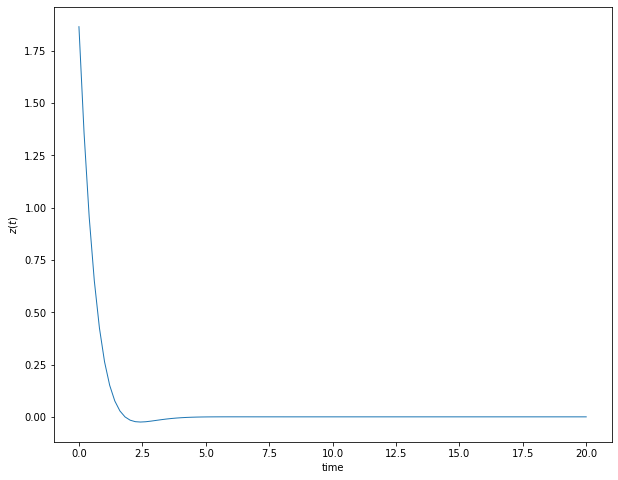

In [3]:
t =  np.linspace(0,20,100)
plt.figure(figsize=(10,8))
plt.plot(t,trajectory(t),linewidth=1)
plt.xlabel("time")
plt.ylabel(rf"$z(t)$")
plt.show()

### Question 2 (a)

$
\begin{align}
D = \gamma -  4mk \lt 0  \qquad \textbf{Under-damped system}
\end{align}
$


In [4]:
def ps(r_1,r_2,t,c_1,c_2,flag=1):
    if flag == 1:
        return (c_1* np.exp(r_1*t)) + (c_2 * np.exp(r_2 * t))
    elif(flag==2):
        return (c_1* np.exp(r_1*t)) + (c_2 * t *  np.exp(r_2 * t))

### Question 2 (a)

$
\begin{align}
D = \gamma -  4mk = 0  \qquad \textbf{Critically-damped system}
\end{align}
$


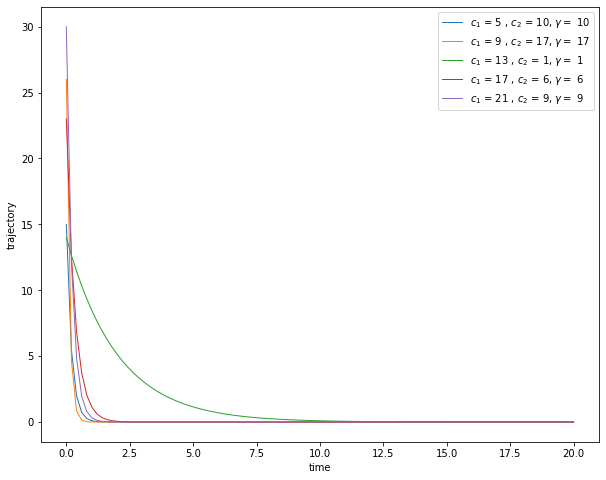

In [5]:
plt.figure(figsize=(10,8))

t =  np.linspace(0,20,100)
c1 = np.arange(1,25,4)
c2 =  np.array([ 6, 10, 17,  1,  6,9])
gamma =  10
m = 1
r_1 =  -gamma/(2*m)

for i in range(1,len(c1)):
    gamma =  c2[i]
    r_1 =  -gamma/(2*m)
    plt.plot(t,ps(r_1,r_1,t,c1[i],c2[i],flag=1),linewidth=1,label=rf'$c_1$ = {c1[i]} , $c_2$ = {c2[i]}, $\gamma=$ {gamma}')
plt.xlabel("time")
plt.ylabel("trajectory")
plt.legend()
plt.show()

### Question 2 (a)

$
\begin{align}
D = \gamma -  4mk \gt 0  \qquad \textbf{Over-damped system}
\end{align}
$


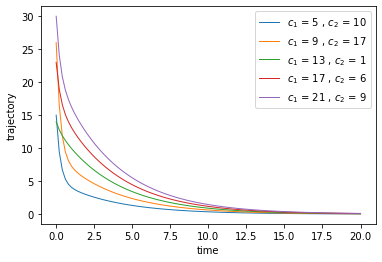

In [6]:
plt.figure(figsize=(6,4))

t =  np.linspace(0,20,100)
c1 = np.arange(1,25,4)
c2 =  np.array([ 6, 10, 17,  1,  6,9])
gamma =  4
m = 1
k = 1
r_1 =  (-gamma + np.sqrt( gamma **2 - (4*m*k)))/(2*m)
r_2 =  (-gamma - np.sqrt( gamma **2 - (4*m*k)))/(2*m)

for i in range(1,len(c1)):
    plt.plot(t,ps(r_1,r_2,t,c1[i],c2[i],flag=1),linewidth=1,label=rf'$c_1$ = {c1[i]} , $c_2$ = {c2[i]}')
plt.xlabel("time")
plt.ylabel("trajectory")
plt.legend()
plt.show()

### Question (4)  (a) (i) Under-damped

$
\begin{align}
\frac{d^2x}{dt^2}  = -x - \beta \frac{dx}{dt} \qquad \textbf{Under-damped system where } 0 < \beta < 2
\end{align}
$


In [33]:
def acceleration(x,beta,v):
    return -x - (beta * v)

def verlet(c,d,dt,x_0,v_0,a,beta):
    t =  np.arange(c,d+dt,dt)
    x  =  np.zeros(len(t))
    v =  np.zeros(len(x))
    x[0],v[0] = 1,1
    for n in range(len(x) -1):
        a_n = a(x[n], beta, v[n])
        x[n+1] = x[n] + (dt * v[n]) + 0.5* (dt**2 * a_n)
        v_hat =  v[n] + (0.5 * dt) *( a_n + a( x[n+1],beta,v[n] + (dt*a_n)))
        v[n+1] = v[n] + (0.5*dt) * (a_n + a(x[n+1], beta, v_hat))
    return t,x,v

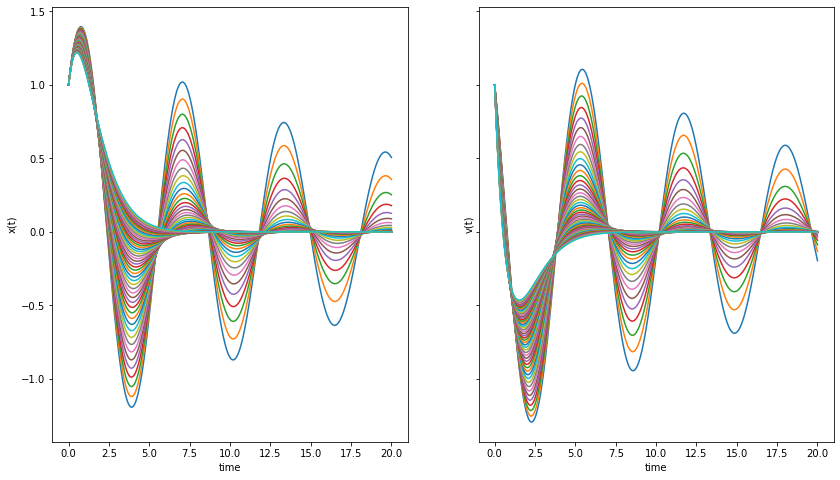

In [34]:
c,d,x_0,v_0 = 0 ,20,0,0
beta = 0.4
delta_t = 0.01
betas =  np.linspace(0.1,1.9)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(14,8))
for beta in betas:
    t,x,v = verlet(c,d,delta_t,x_0,v_0,acceleration,beta)
    ax1.plot(t,x)
    ax2.plot(t,v)
ax1.set_xlabel("time")
ax1.set_ylabel(rf"x(t)")
ax2.set_xlabel("time")
ax2.set_ylabel(rf"v(t)")
plt.show()


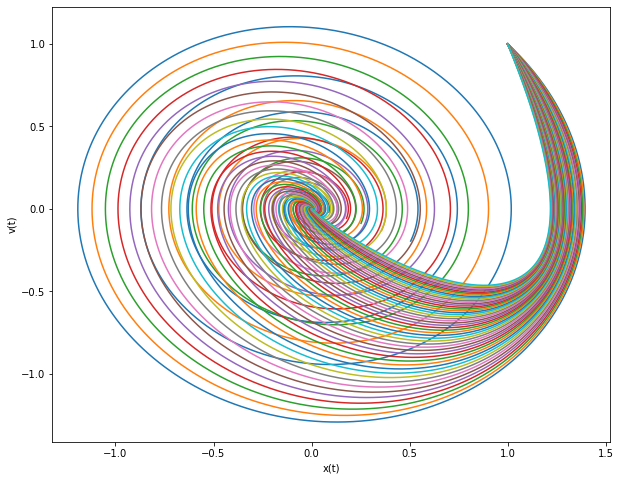

In [35]:
fig = plt.figure(figsize=(10,8))
for beta in betas:
    t,x,v = verlet(c,d,delta_t,x_0,v_0,acceleration,beta)
    plt.plot(x,v)
plt.xlabel(rf"x(t)")
plt.ylabel(rf"v(t)")
plt.show()

### Question (4)  (a) (i) Over-damped

$
\begin{align}
\frac{d^2x}{dt^2}  = -x - \beta \frac{dx}{dt} \qquad \textbf{Under-damped system where } 2 \le \beta \le +\infty
\end{align}
$


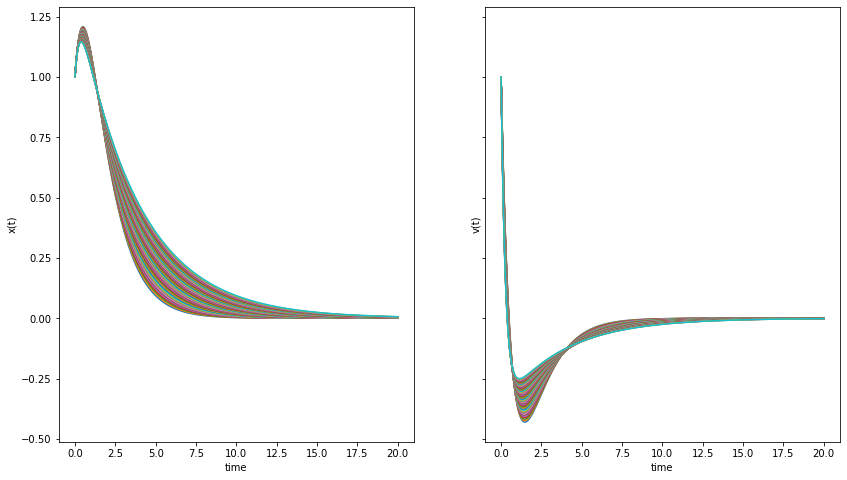

In [36]:
betas =  np.linspace(2.1,4.0)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(14,8))
for beta in betas:
    t,x,v = verlet(c,d,delta_t,x_0,v_0,acceleration,beta)
    ax1.plot(t,x)
    ax2.plot(t,v)
ax1.set_xlabel("time")
ax1.set_ylabel(rf"x(t)")
ax2.set_xlabel("time")
ax2.set_ylabel(rf"v(t)")
plt.show()


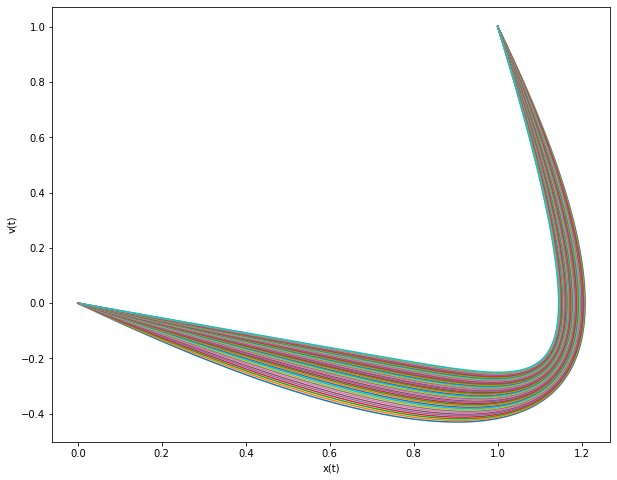

In [37]:
fig = plt.figure(figsize=(10,8))
for beta in betas:
    t,x,v = verlet(c,d,delta_t,x_0,v_0,acceleration,beta)
    plt.plot(x,v)

plt.xlabel(rf"x(t)")
plt.ylabel(rf"v(t)")
plt.show()

### Question (4)  (b)

$
\begin{align}
a_n  = -x  + \beta \sin\left( v \right) 
\end{align}
$


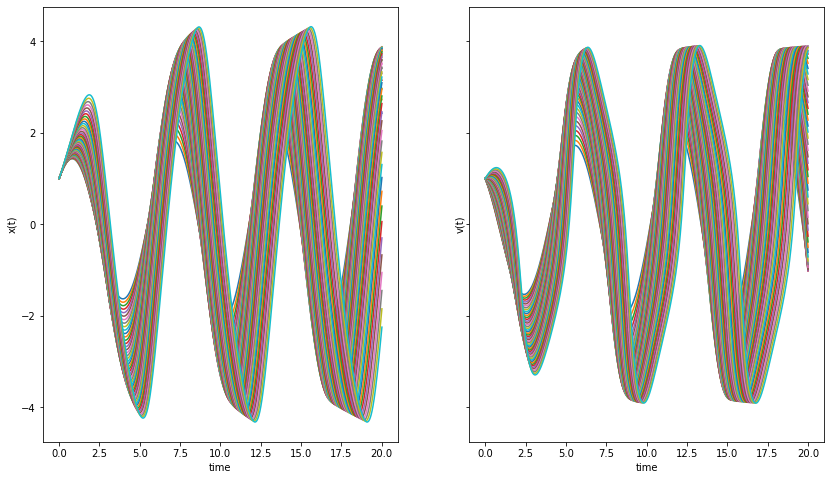

In [39]:
def acceleration(x,beta,v):
    return -x + beta* np.sin(v)

c,d,x_0,v_0 = 0 ,20,1,0
delta_t = 0.01
betas =  np.linspace(0.11,1.9,50)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(14,8))
flag = 1
for beta in betas:
    t,x,v = verlet(c,d,delta_t,x_0,v_0,acceleration,beta)
    ax1.plot(t,x)
    ax2.plot(t,v)
ax1.set_xlabel("time")
ax1.set_ylabel(rf"x(t)")
ax2.set_xlabel("time")
ax2.set_ylabel(rf"v(t)")
plt.show()

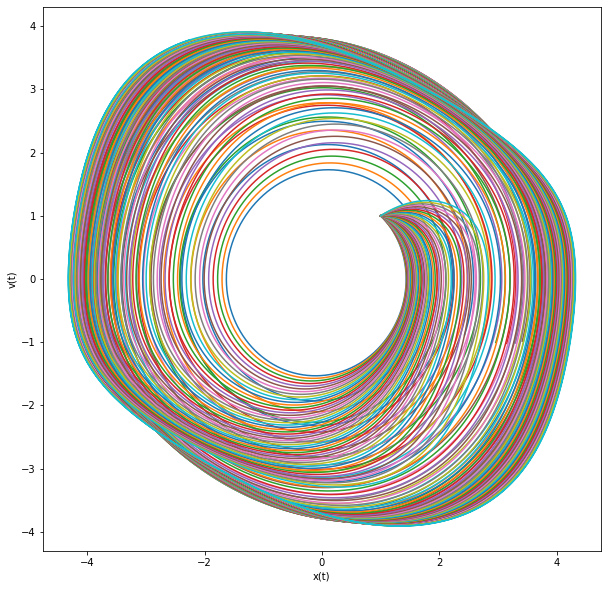

In [41]:
fig = plt.figure(figsize=(10,10))
flag=1
for beta in betas:
    t,x,v = verlet(c,d,delta_t,x_0,v_0,acceleration,beta)
    plt.plot(x,v)

plt.xlabel(rf"x(t)")
plt.ylabel(rf"v(t)")
plt.show()